In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import plotly


In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('Influenza_data.xlsx')
df.sample(5)

,WHO region,ITZ,COUNTRY/AREA/TERRITORY,COUNTRY_CODE,ORIGIN_SOURCE,ISO_YEAR,ISO_WEEK,ISO_SDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,...,AH5,ANOTSUBTYPED,INF_A,BVIC,BYAM,BNOTDETERMINED,INF_B,INF_ALL,INF_NEGATIVE,ILI_ACTIVITY
972,SEAR,Southern Asia,India,IND,NOTDEFINED,2018,41,2018-10-07T18:30:00.000Z,448.0,448.0,...,NaN,NaN,87.0,NaN,2.0,NaN,2.0,89.0,359.0,4
873,SEAR,Southern Asia,India,IND,NOTDEFINED,2016,42,2016-10-16T18:30:00.000Z,21.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,3
1220,SEAR,Southern Asia,India,IND,SENTINEL,2022,48,2022-11-27T18:30:00.000Z,245.0,245.0,...,NaN,NaN,9.0,1.0,NaN,NaN,1.0,10.0,235.0,3
682,SEAR,Southern Asia,India,IND,NOTDEFINED,2013,8,2013-02-17T18:30:00.000Z,301.0,301.0,...,0.0,0.0,40.0,NaN,0.0,12.0,12.0,52.0,NaN,3
920,SEAR,Southern Asia,India,IND,NOTDEFINED,2017,41,2017-10-08T18:30:00.000Z,382.0,382.0,...,NaN,NaN,53.0,NaN,NaN,NaN,NaN,53.0,NaN,5


In [4]:
df.shape

(1305, 23)

In [5]:
df['INF_A'].isnull().sum()


421

In [6]:
df['INF_B'].isnull().sum()


631

In [7]:
print((df['INF_B'] <= 0).sum())  # Check how many invalid values


0


### Description for INF_A and INF_B

In [8]:
df[['INF_A','INF_B','INF_ALL']].describe()

,INF_A,INF_B,INF_ALL
count,884.000000,674.000000,947.000000
mean,48.165158,12.143917,53.601901
std,108.149449,23.317023,108.193366
min,1.000000,1.000000,1.000000
25%,4.000000,2.000000,6.000000
50%,16.000000,5.000000,21.000000
75%,45.000000,13.000000,53.000000
max,1038.000000,265.000000,1040.000000


### Handling Date Time Column

In [9]:
df['DATE'] = pd.to_datetime(df['ISO_SDATE'])


In [10]:
df['DATE'] = df['DATE'].dt.date

In [11]:
df.head(2)

,WHO region,ITZ,COUNTRY/AREA/TERRITORY,COUNTRY_CODE,ORIGIN_SOURCE,ISO_YEAR,ISO_WEEK,ISO_SDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,...,ANOTSUBTYPED,INF_A,BVIC,BYAM,BNOTDETERMINED,INF_B,INF_ALL,INF_NEGATIVE,ILI_ACTIVITY,DATE
0,SEAR,Southern Asia,India,IND,NONSENTINEL,2021,32,2021-08-08T18:30:00.000Z,2767.0,2767.0,...,NaN,373.0,9.0,NaN,NaN,9.0,382.0,2385.0,3,2021-08-08
1,SEAR,Southern Asia,India,IND,NONSENTINEL,2021,33,2021-08-15T18:30:00.000Z,3436.0,3436.0,...,NaN,460.0,16.0,NaN,NaN,16.0,476.0,2960.0,3,2021-08-15


### Sorting the data in increasing order

In [12]:
df = df.sort_values(by='DATE')

In [13]:
df.head()

,WHO region,ITZ,COUNTRY/AREA/TERRITORY,COUNTRY_CODE,ORIGIN_SOURCE,ISO_YEAR,ISO_WEEK,ISO_SDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,...,ANOTSUBTYPED,INF_A,BVIC,BYAM,BNOTDETERMINED,INF_B,INF_ALL,INF_NEGATIVE,ILI_ACTIVITY,DATE
152,SEAR,Southern Asia,India,IND,NOTDEFINED,1997,1,1996-12-29T18:30:00.000Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1996-12-29
153,SEAR,Southern Asia,India,IND,NOTDEFINED,1997,9,1997-02-23T18:30:00.000Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1997-02-23
154,SEAR,Southern Asia,India,IND,NOTDEFINED,1997,10,1997-03-02T18:30:00.000Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1997-03-02
155,SEAR,Southern Asia,India,IND,NOTDEFINED,1997,11,1997-03-09T18:30:00.000Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1997-03-09
156,SEAR,Southern Asia,India,IND,NOTDEFINED,1997,12,1997-03-16T18:30:00.000Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1997-03-16


In [14]:
df = df[['DATE','INF_A','INF_B']]

In [15]:
df

,DATE,INF_A,INF_B
152,1996-12-29,NaN,NaN
153,1997-02-23,NaN,NaN
154,1997-03-02,NaN,NaN
155,1997-03-09,NaN,NaN
156,1997-03-16,NaN,NaN
...,...,...,...
1302,2024-06-30,4.0,5.0
1303,2024-07-14,28.0,6.0
150,2024-07-14,79.0,1.0
151,2024-07-21,76.0,1.0


### Checking the duplicates

In [16]:
df['DATE'].value_counts()

DATE
2022-02-13    3
2022-05-15    3
2022-02-20    3
2022-02-27    3
2022-03-06    3
             ..
2010-02-28    1
2010-03-07    1
2010-03-14    1
2010-03-21    1
2013-09-01    1
Name: count, Length: 1116, dtype: int64

### Handling the duplicates

In [17]:
df=df.groupby('DATE', as_index=False).sum()

In [18]:
df.shape

(1116, 3)

In [19]:
df

,DATE,INF_A,INF_B
0,1996-12-29,0.0,0.0
1,1997-02-23,0.0,0.0
2,1997-03-02,0.0,0.0
3,1997-03-09,0.0,0.0
4,1997-03-16,0.0,0.0
...,...,...,...
1111,2024-06-16,18.0,1.0
1112,2024-06-23,17.0,2.0
1113,2024-06-30,44.0,6.0
1114,2024-07-14,107.0,7.0


In [20]:
df.isnull().sum()

DATE     0
INF_A    0
INF_B    0
dtype: int64

### Filling the missing values with forward fill method

In [21]:
df['INF_A_ffill'] = df['INF_A'].fillna(method='ffill')

In [22]:
df['INF_B_ffill'] = df['INF_B'].fillna(method='ffill')

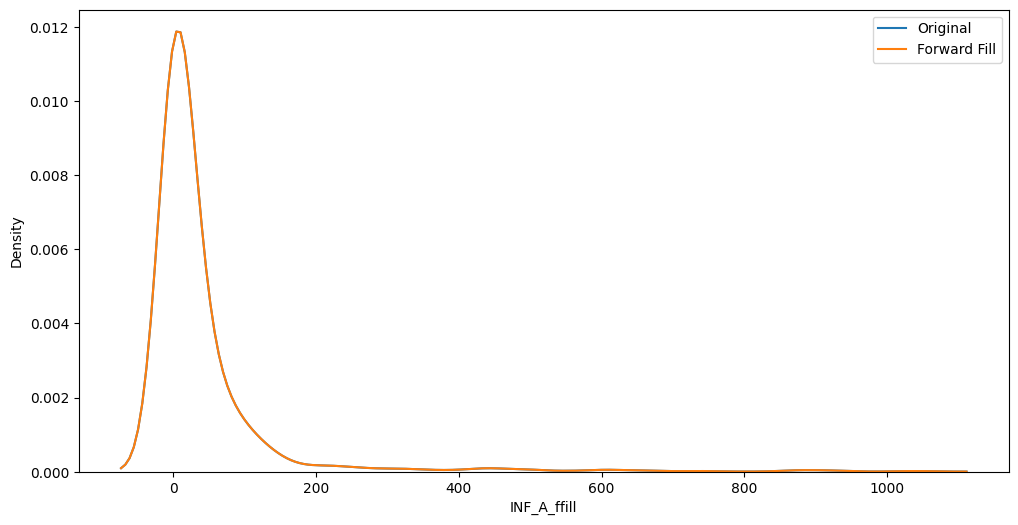

In [23]:
plt.figure(figsize=(12,6))
sns.distplot(df['INF_A'], label='Original', hist=False)
sns.distplot(df['INF_A_ffill'], label='Forward Fill', hist=False)
plt.legend()
plt.show()

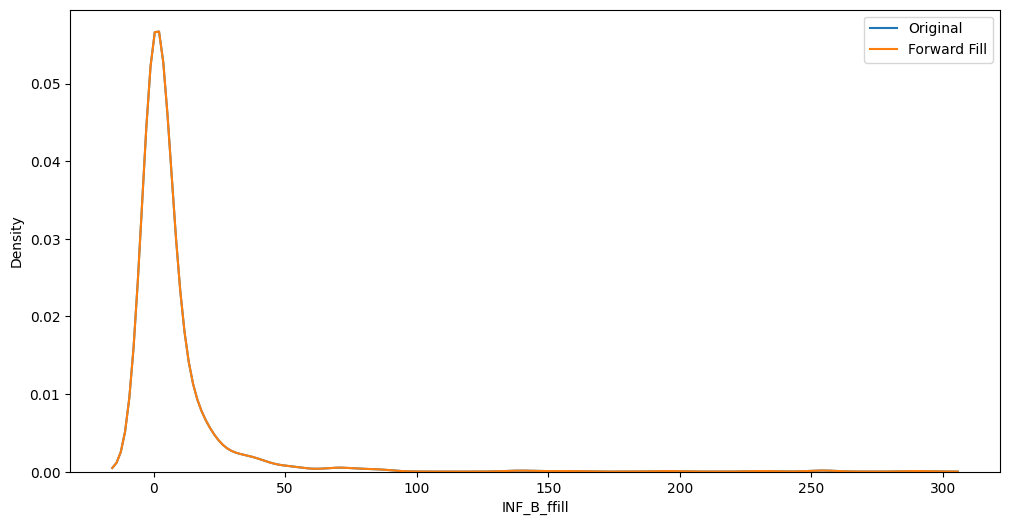

In [24]:
plt.figure(figsize=(12,6))
sns.distplot(df['INF_B'], label='Original', hist=False)
sns.distplot(df['INF_B_ffill'], label='Forward Fill', hist=False)
plt.legend()
plt.show()

### Desription after the imputation

In [25]:
df[['INF_A','INF_A_ffill','INF_B','INF_B_ffill']].describe()

,INF_A,INF_A_ffill,INF_B,INF_B_ffill
count,1116.00000,1116.00000,1116.000000,1116.000000
mean,38.15233,38.15233,7.334229,7.334229
std,99.28832,99.28832,21.273119,21.273119
min,0.00000,0.00000,0.000000,0.000000
25%,0.00000,0.00000,0.000000,0.000000
50%,5.00000,5.00000,1.000000,1.000000
75%,35.00000,35.00000,6.250000,6.250000
max,1038.00000,1038.00000,290.000000,290.000000


In [26]:
df_INF = df[['DATE','INF_A_ffill', 'INF_B_ffill']]

In [27]:
df_INF.head()

,DATE,INF_A_ffill,INF_B_ffill
0,1996-12-29,0.0,0.0
1,1997-02-23,0.0,0.0
2,1997-03-02,0.0,0.0
3,1997-03-09,0.0,0.0
4,1997-03-16,0.0,0.0


### Making Data Ready For Prophet

In [28]:
df_INF_A = df_INF[['DATE','INF_A_ffill']]

In [29]:
df_INF_A.columns = ['ds', 'y']  # Prophet requires these exact column names

In [30]:
# df_INF_A['unique_id'] = 'INF_A Cases'

In [31]:
df_INF_A.head()

,ds,y
0,1996-12-29,0.0
1,1997-02-23,0.0
2,1997-03-02,0.0
3,1997-03-09,0.0
4,1997-03-16,0.0


In [32]:
df_INF_A.tail(231)


,ds,y
885,2020-01-05,10.0
886,2020-01-12,10.0
887,2020-01-26,14.0
888,2020-02-02,20.0
889,2020-02-09,40.0
...,...,...
1111,2024-06-16,18.0
1112,2024-06-23,17.0
1113,2024-06-30,44.0
1114,2024-07-14,107.0


### Train-Test-Split

#### Taking data upto 2020 for training and remaining for testing.

In [33]:
train_A = df_INF_A[:885]
test_A = df_INF_A[885:]

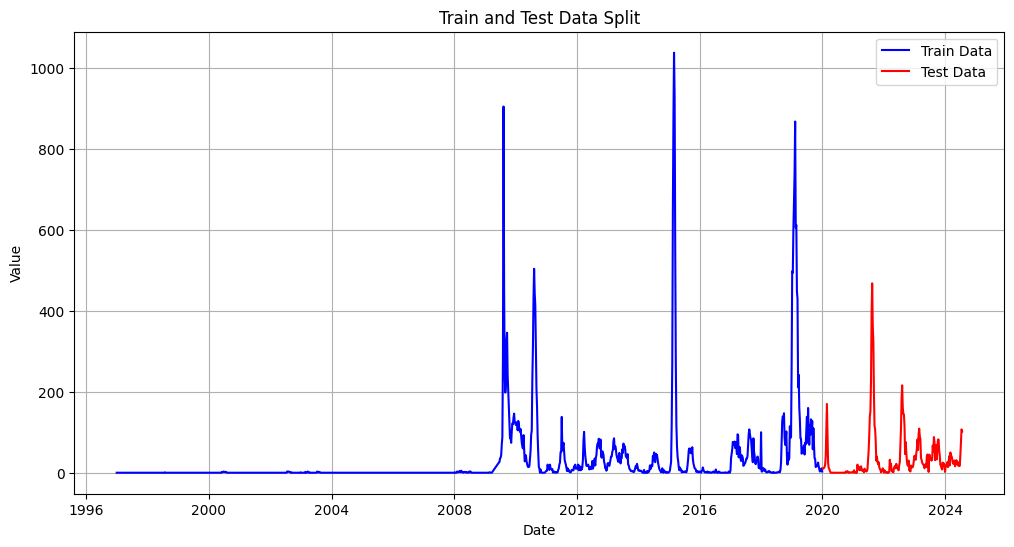

In [34]:
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train_A['ds'], train_A['y'], label='Train Data', color='blue')

# Plot the testing data
plt.plot(test_A['ds'], test_A['y'], label='Test Data', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train and Test Data Split')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

### Fitting Prophet

In [35]:
from prophet import Prophet

### Make and Fit the Model

In [36]:
model_A = Prophet()
model_A.fit(train_A)

03:57:27 - cmdstanpy - INFO - Chain [1] start processing
03:57:28 - cmdstanpy - INFO - Chain [1] done processing


### Making Predictions

In [37]:
pred = model_A.predict(test_A)

In [38]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-05,95.151452,-28.256061,214.732619,95.151452,95.151452,-1.338546,-1.338546,-1.338546,-1.338546,-1.338546,-1.338546,0.0,0.0,0.0,93.812905
1,2020-01-12,95.355505,-22.658352,222.205912,95.355505,95.355505,7.276761,7.276761,7.276761,7.276761,7.276761,7.276761,0.0,0.0,0.0,102.632266
2,2020-01-26,95.763612,-3.598699,248.782150,95.763612,95.763612,18.561935,18.561935,18.561935,18.561935,18.561935,18.561935,0.0,0.0,0.0,114.325547
3,2020-02-02,95.967665,-2.049604,255.212153,95.967665,95.967665,28.842633,28.842633,28.842633,28.842633,28.842633,28.842633,0.0,0.0,0.0,124.810298
4,2020-02-09,96.171718,12.973693,262.063886,96.171718,96.171718,43.276177,43.276177,43.276177,43.276177,43.276177,43.276177,0.0,0.0,0.0,139.447895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2024-06-16,142.491830,-0.512725,245.544277,138.251385,146.583347,-24.015220,-24.015220,-24.015220,-24.015220,-24.015220,-24.015220,0.0,0.0,0.0,118.476609
227,2024-06-23,142.695883,5.995872,256.708124,138.409709,146.813775,-13.748414,-13.748414,-13.748414,-13.748414,-13.748414,-13.748414,0.0,0.0,0.0,128.947469
228,2024-06-30,142.899937,3.499674,262.024302,138.570437,147.063759,-7.335791,-7.335791,-7.335791,-7.335791,-7.335791,-7.335791,0.0,0.0,0.0,135.564145
229,2024-07-14,143.308043,3.560572,258.690319,138.956382,147.492619,-8.634632,-8.634632,-8.634632,-8.634632,-8.634632,-8.634632,0.0,0.0,0.0,134.673411


In [39]:

pred = pred[["ds", "yhat", "yhat_lower", "yhat_upper"]]
pred.rename(
    columns={
        "yhat": "Prophet",
        "yhat_lower": "Prophet-lo-80",
        "yhat_upper": "Prophet-hi-80",
    },
    inplace=True,
)

In [40]:
pred

,ds,Prophet,Prophet-lo-80,Prophet-hi-80
0,2020-01-05,93.812905,-28.256061,214.732619
1,2020-01-12,102.632266,-22.658352,222.205912
2,2020-01-26,114.325547,-3.598699,248.782150
3,2020-02-02,124.810298,-2.049604,255.212153
4,2020-02-09,139.447895,12.973693,262.063886
...,...,...,...,...
226,2024-06-16,118.476609,-0.512725,245.544277
227,2024-06-23,128.947469,5.995872,256.708124
228,2024-06-30,135.564145,3.499674,262.024302
229,2024-07-14,134.673411,3.560572,258.690319


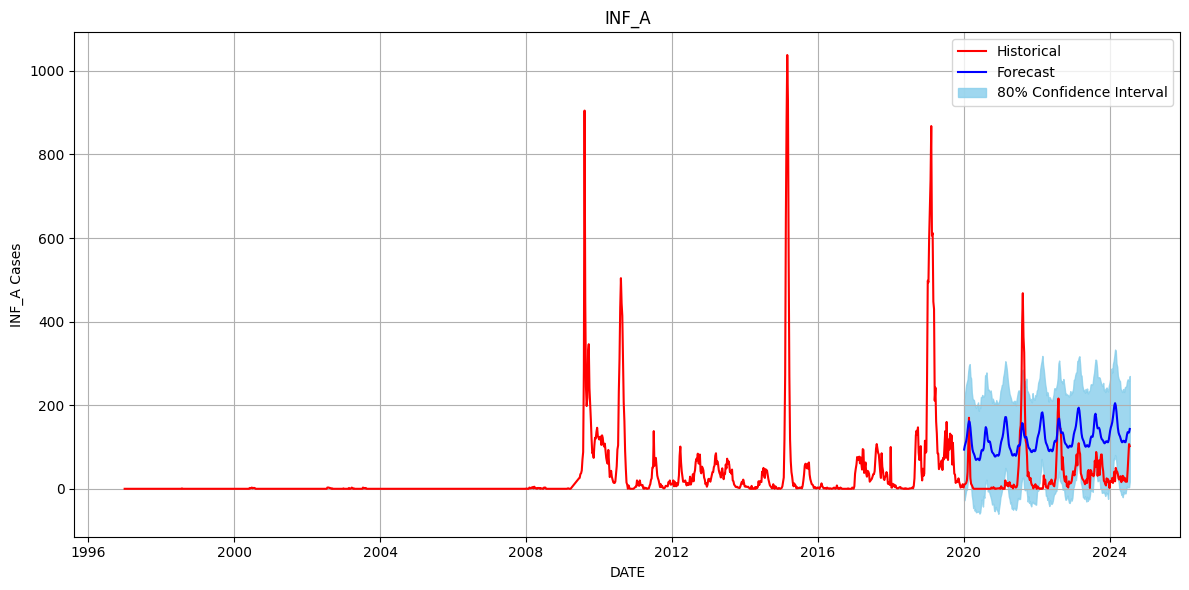

In [41]:
import matplotlib.pyplot as plt

# Plot actual values
plt.figure(figsize=(12, 6))
plt.plot(df_INF_A['ds'], df_INF_A['y'], label='Historical', color='red')

# Plot forecast
plt.plot(pred['ds'], pred['Prophet'], label='Forecast', color='blue')

# Plot confidence interval
if 'Prophet-lo-80' in pred.columns and 'Prophet-hi-80' in pred.columns:
    plt.fill_between(pred['ds'], pred['Prophet-lo-80'], pred['Prophet-hi-80'],
                     color='skyblue', alpha=0.8, label='80% Confidence Interval')

# Add labels and title
plt.xlabel("DATE")
plt.ylabel("INF_A Cases")
plt.title("INF_A")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [43]:
y_true = test_A['y'].values
y_pred = pred['Prophet'].values

In [44]:
y_pred.shape

(231,)

In [45]:
y_true.shape

(231,)

In [46]:
mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100

### Finding RMSE, MAE, MAPE for INF_A


In [47]:


print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("MAE:", mean_absolute_error(y_true, y_pred))
print("MAPE:", mape)


RMSE: 101.68136175801878
MAE: 94.3642463470901
MAPE: 148519998939.16315


### Taking last 6 months data for testing

In [48]:
train_A = df_INF_A[:1088]
test_A = df_INF_A[1088:]

In [49]:
train_A.shape,test_A.shape

((1088, 2), (28, 2))

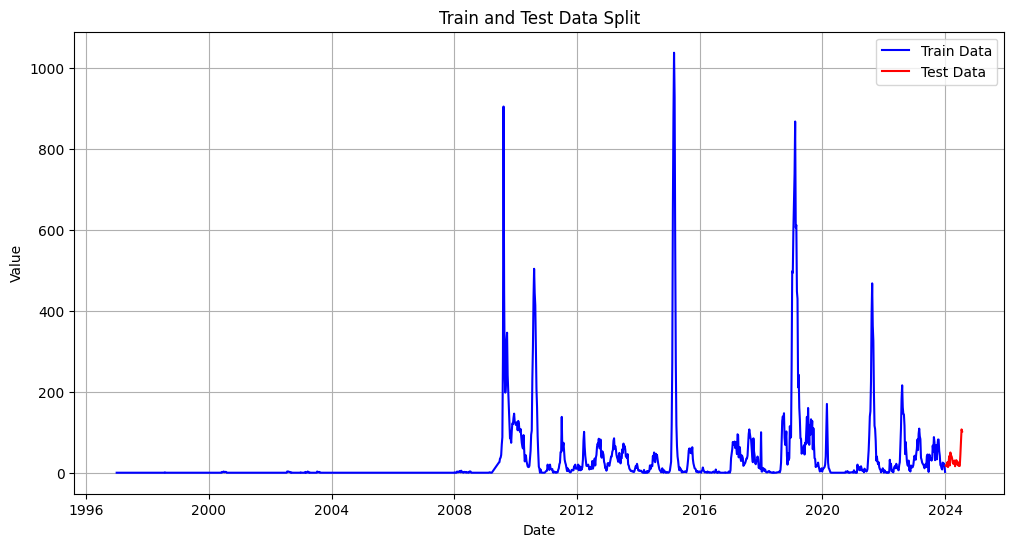

In [50]:
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train_A['ds'], train_A['y'], label='Train Data', color='blue')

# Plot the testing data
plt.plot(test_A['ds'], test_A['y'], label='Test Data', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train and Test Data Split')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [51]:
model_A = Prophet()
model_A.fit(train_A)

03:57:53 - cmdstanpy - INFO - Chain [1] start processing
03:57:53 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
pred = model_A.predict(test_A)

In [53]:

pred = pred[["ds", "yhat", "yhat_lower", "yhat_upper"]]
pred.rename(
    columns={
        "yhat": "Prophet",
        "yhat_lower": "Prophet-lo-80",
        "yhat_upper": "Prophet-hi-80",
    },
    inplace=True,
)

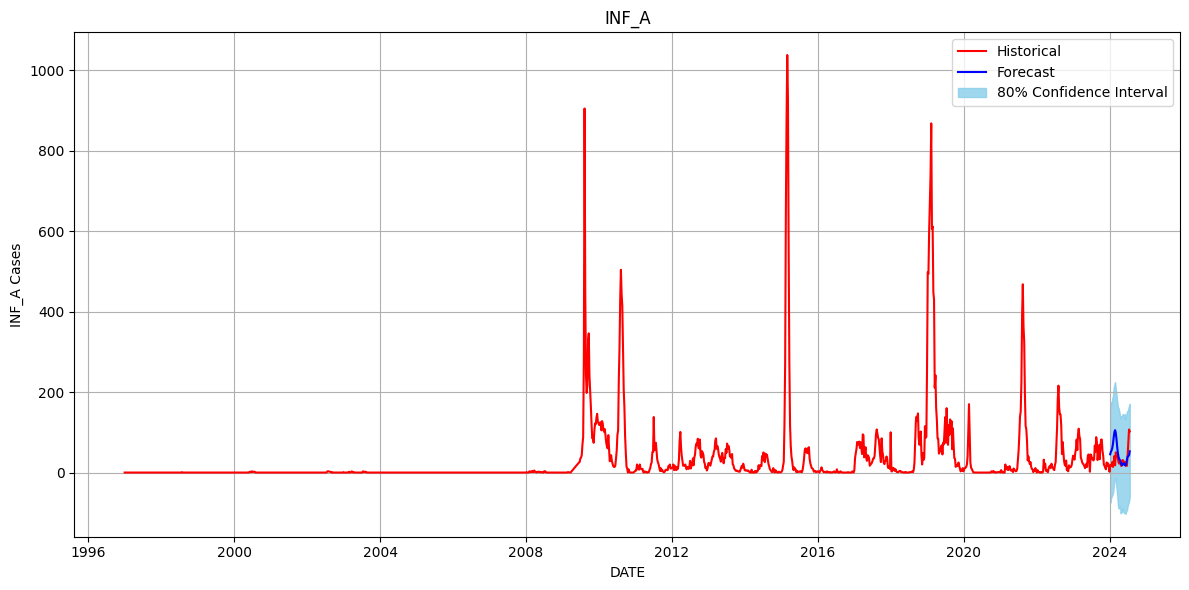

In [54]:
import matplotlib.pyplot as plt

# Plot actual values
plt.figure(figsize=(12, 6))
plt.plot(df_INF_A['ds'], df_INF_A['y'], label='Historical', color='red')

# Plot forecast
plt.plot(pred['ds'], pred['Prophet'], label='Forecast', color='blue')

# Plot confidence interval
if 'Prophet-lo-80' in pred.columns and 'Prophet-hi-80' in pred.columns:
    plt.fill_between(pred['ds'], pred['Prophet-lo-80'], pred['Prophet-hi-80'],
                     color='skyblue', alpha=0.8, label='80% Confidence Interval')

# Add labels and title
plt.xlabel("DATE")
plt.ylabel("INF_A Cases")
plt.title("INF_A")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


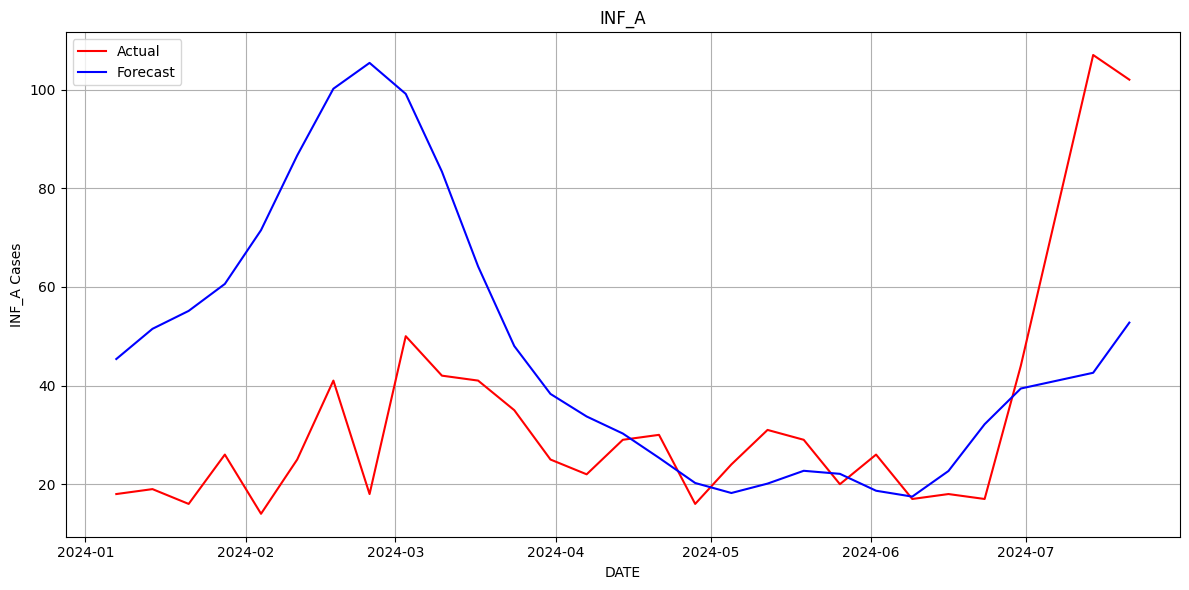

In [55]:
import matplotlib.pyplot as plt 

# Plot actual values
plt.figure(figsize=(12, 6))
plt.plot(test_A['ds'], test_A['y'], label='Actual', color='red')

# Plot forecast
plt.plot(pred['ds'], pred['Prophet'], label='Forecast', color='blue')

# Add labels and title
plt.xlabel("DATE")
plt.ylabel("INF_A Cases")
plt.title("INF_A")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [95]:
y_true = test_A['y'].values
y_pred = pred['Prophet'].values

In [96]:
mape_A = np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1, y_true))) * 100


In [97]:
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("MAE:", mean_absolute_error(y_true, y_pred))
print("MAPE:", mape_A)


RMSE: 24.77941428908813
MAE: 13.628869886633229
MAPE: 29.566639598104853


### For INF_B

In [104]:
df_INF_B   = df[['DATE', 'INF_B_ffill']]
df_INF_B.head()

,DATE,INF_B_ffill
0,1996-12-29,0.0
1,1997-02-23,0.0
2,1997-03-02,0.0
3,1997-03-09,0.0
4,1997-03-16,0.0


In [105]:
df_INF_B.columns = ['ds', 'y']
df_INF_B.head()

,ds,y
0,1996-12-29,0.0
1,1997-02-23,0.0
2,1997-03-02,0.0
3,1997-03-09,0.0
4,1997-03-16,0.0


In [106]:
train_B  = df_INF_B[:885]
test_B = df_INF_B[885:]

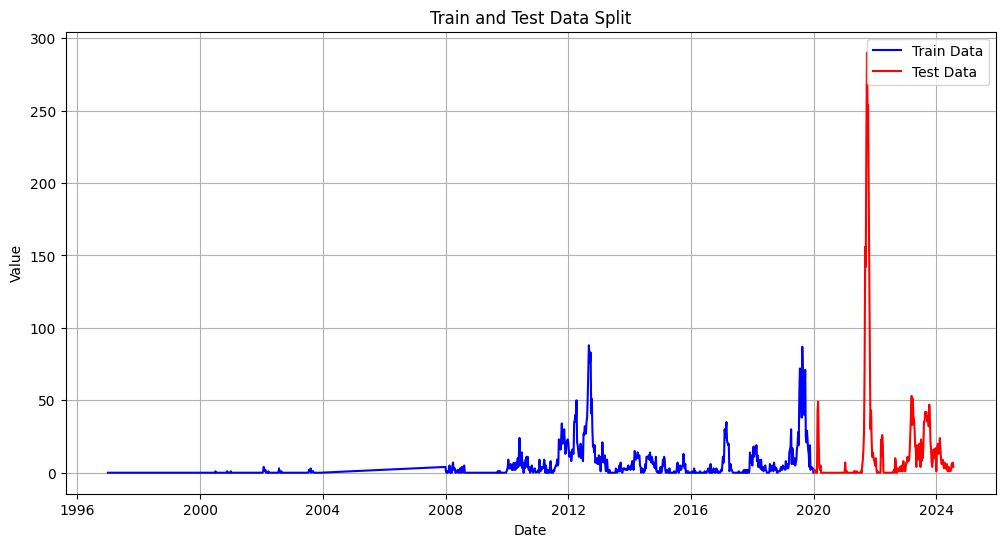

In [107]:
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train_B['ds'], train_B['y'], label='Train Data', color='blue')

# Plot the testing data
plt.plot(test_B['ds'], test_B['y'], label='Test Data', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train and Test Data Split')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [108]:
model_B = Prophet()

In [109]:
model_B.fit(train_B)

05:52:06 - cmdstanpy - INFO - Chain [1] start processing
05:52:06 - cmdstanpy - INFO - Chain [1] done processing


In [110]:
pred = model_B.predict(test_B)
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-05,14.486911,0.972259,25.156363,14.486911,14.486911,-1.580651,-1.580651,-1.580651,-1.580651,-1.580651,-1.580651,0.0,0.0,0.0,12.906260
1,2020-01-12,14.539598,0.834885,26.314053,14.539598,14.539598,-1.456434,-1.456434,-1.456434,-1.456434,-1.456434,-1.456434,0.0,0.0,0.0,13.083164
2,2020-01-26,14.644973,1.611818,26.355036,14.644973,14.644973,-0.726205,-0.726205,-0.726205,-0.726205,-0.726205,-0.726205,0.0,0.0,0.0,13.918768
3,2020-02-02,14.697660,2.931050,27.275003,14.697660,14.697660,0.144455,0.144455,0.144455,0.144455,0.144455,0.144455,0.0,0.0,0.0,14.842116
4,2020-02-09,14.750348,3.922689,28.466183,14.750348,14.750348,0.986017,0.986017,0.986017,0.986017,0.986017,0.986017,0.0,0.0,0.0,15.736364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2024-06-16,26.710375,11.446471,36.709980,23.696378,30.088501,-2.449864,-2.449864,-2.449864,-2.449864,-2.449864,-2.449864,0.0,0.0,0.0,24.260511
227,2024-06-23,26.763062,11.281470,37.577467,23.720033,30.181980,-2.578473,-2.578473,-2.578473,-2.578473,-2.578473,-2.578473,0.0,0.0,0.0,24.184589
228,2024-06-30,26.815750,12.650107,37.794943,23.743735,30.254153,-1.857681,-1.857681,-1.857681,-1.857681,-1.857681,-1.857681,0.0,0.0,0.0,24.958068
229,2024-07-14,26.921125,15.504056,41.889894,23.820125,30.378442,1.141459,1.141459,1.141459,1.141459,1.141459,1.141459,0.0,0.0,0.0,28.062584


In [111]:
pred = pred[["ds", "yhat", "yhat_lower", "yhat_upper"]]
pred.rename(
    columns={
        "yhat": "Prophet",
        "yhat_lower": "Prophet-lo-80",
        "yhat_upper": "Prophet-hi-80",
    },
    inplace=True,
)

In [112]:
pred

,ds,Prophet,Prophet-lo-80,Prophet-hi-80
0,2020-01-05,12.906260,0.972259,25.156363
1,2020-01-12,13.083164,0.834885,26.314053
2,2020-01-26,13.918768,1.611818,26.355036
3,2020-02-02,14.842116,2.931050,27.275003
4,2020-02-09,15.736364,3.922689,28.466183
...,...,...,...,...
226,2024-06-16,24.260511,11.446471,36.709980
227,2024-06-23,24.184589,11.281470,37.577467
228,2024-06-30,24.958068,12.650107,37.794943
229,2024-07-14,28.062584,15.504056,41.889894


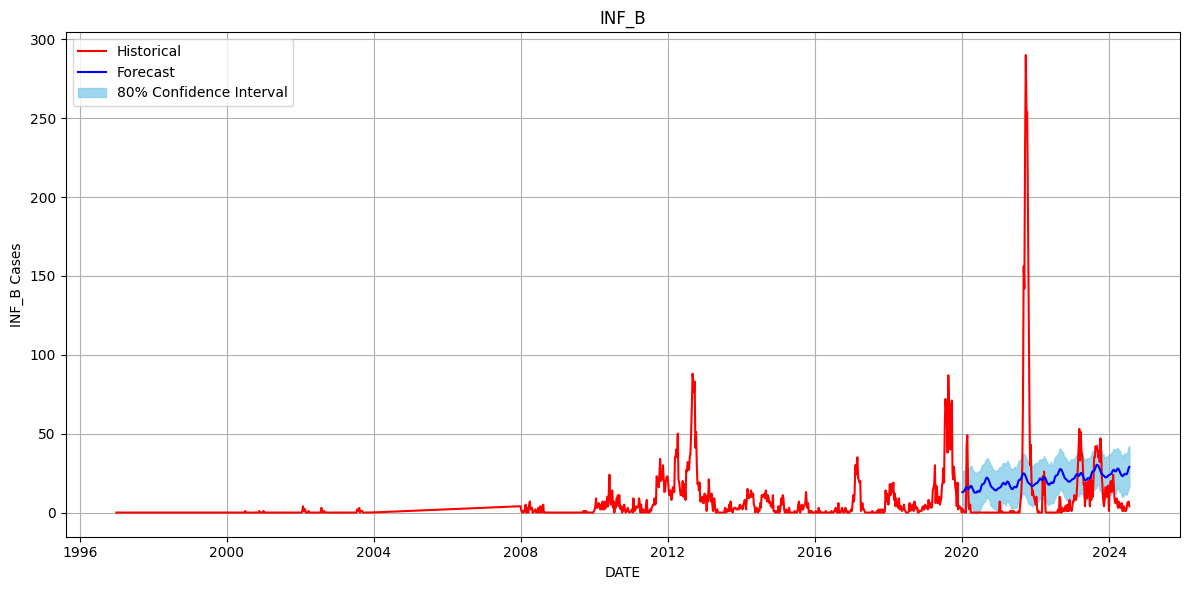

In [113]:
import matplotlib.pyplot as plt

# Plot actual values
plt.figure(figsize=(12, 6))
plt.plot(df_INF_B['ds'], df_INF_B['y'], label='Historical', color='red')

# Plot forecast
plt.plot(pred['ds'], pred['Prophet'], label='Forecast', color='blue')

# Plot confidence interval
if 'Prophet-lo-80' in pred.columns and 'Prophet-hi-80' in pred.columns:
    plt.fill_between(pred['ds'], pred['Prophet-lo-80'], pred['Prophet-hi-80'],
                     color='skyblue', alpha=0.8, label='80% Confidence Interval')

# Add labels and title
plt.xlabel("DATE")
plt.ylabel("INF_B Cases")
plt.title("INF_B")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [114]:
y_true = test_B['y'].values
y_pred = pred['Prophet'].values

In [115]:
mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1, y_true))) * 100

In [116]:
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("MAE:", mean_absolute_error(y_true, y_pred))
print("MAPE:", mape_B)


RMSE: 39.77454458585705
MAE: 21.7013157009403
MAPE: 455.39224419134825


### Testing on last 6 months data

In [117]:
train_B  = df_INF_B[:1088]
test_B = df_INF_B[1088:]

In [118]:
test_B.head()

,ds,y
1088,2024-01-07,16.0
1089,2024-01-14,19.0
1090,2024-01-21,20.0
1091,2024-01-28,13.0
1092,2024-02-04,16.0


In [119]:
test_B.shape

(28, 2)

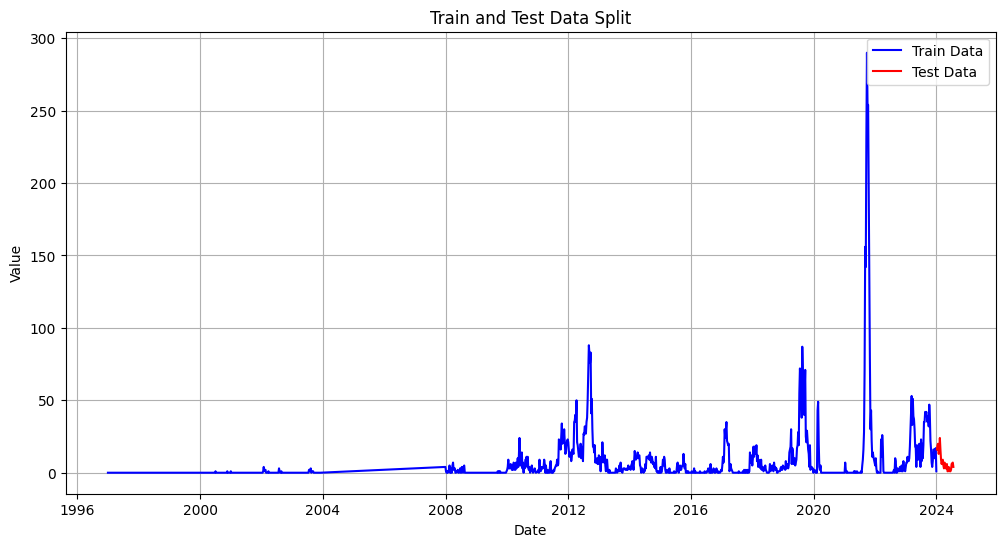

In [120]:
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train_B['ds'], train_B['y'], label='Train Data', color='blue')

# Plot the testing data
plt.plot(test_B['ds'], test_B['y'], label='Test Data', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train and Test Data Split')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [121]:
model_B = Prophet()
model_B.fit(train_B)
pred = model_B.predict(test_B)

05:52:18 - cmdstanpy - INFO - Chain [1] start processing
05:52:18 - cmdstanpy - INFO - Chain [1] done processing


In [122]:
pred = pred[["ds", "yhat", "yhat_lower", "yhat_upper"]]
pred.rename(
    columns={
        "yhat": "Prophet",
        "yhat_lower": "Prophet-lo-80",
        "yhat_upper": "Prophet-hi-80",
    },
    inplace=True,
)

In [123]:
pred.shape

(28, 4)

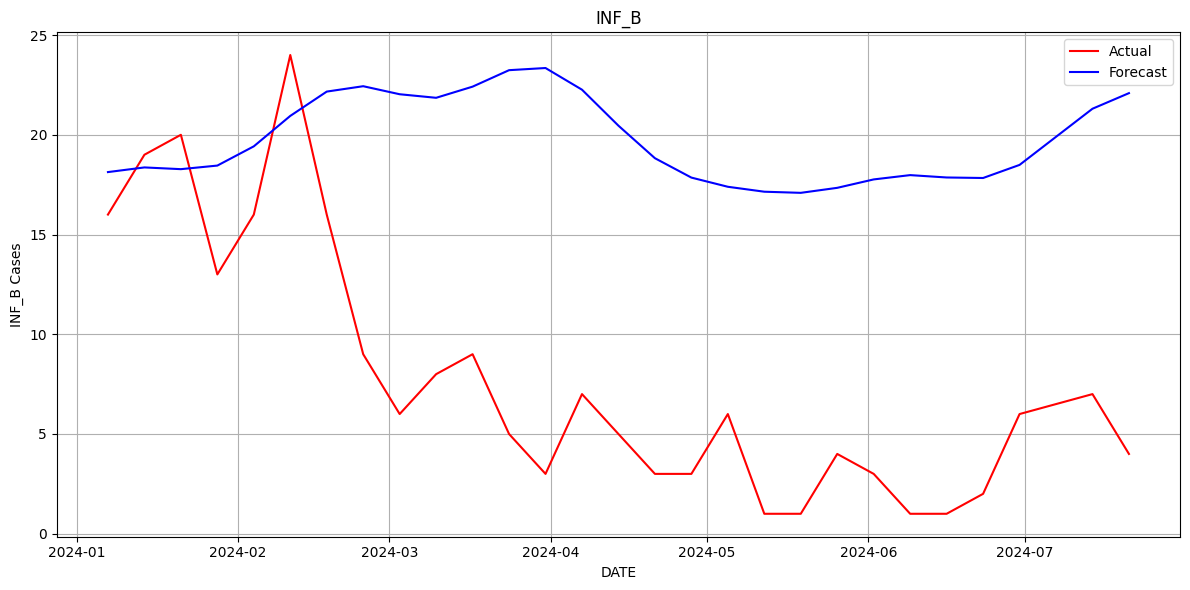

In [124]:
import matplotlib.pyplot as plt 

# Plot actual values
plt.figure(figsize=(12, 6))
plt.plot(test_B['ds'], test_B['y'], label='Actual', color='red')

# Plot forecast
plt.plot(pred['ds'], pred['Prophet'], label='Forecast', color='blue')

# Add labels and title
plt.xlabel("DATE")
plt.ylabel("INF_B Cases")
plt.title("INF_B")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


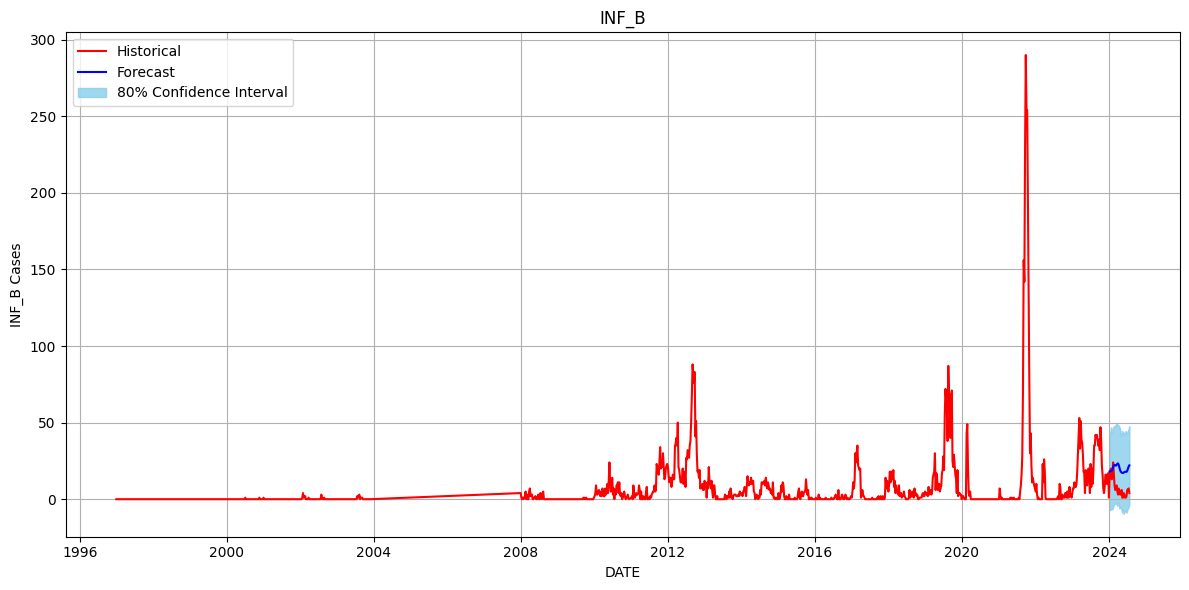

In [125]:
import matplotlib.pyplot as plt

# Plot actual values
plt.figure(figsize=(12, 6))
plt.plot(df_INF_B['ds'], df_INF_B['y'], label='Historical', color='red')

# Plot forecast
plt.plot(pred['ds'], pred['Prophet'], label='Forecast', color='blue')

# Plot confidence interval
if 'Prophet-lo-80' in pred.columns and 'Prophet-hi-80' in pred.columns:
    plt.fill_between(pred['ds'], pred['Prophet-lo-80'], pred['Prophet-hi-80'],
                     color='skyblue', alpha=0.8, label='80% Confidence Interval')

# Add labels and title
plt.xlabel("DATE")
plt.ylabel("INF_B Cases")
plt.title("INF_B")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [126]:
y_true = test_B['y'].values
y_pred = pred['Prophet'].values

In [127]:
y_pred

array([18.1304029 , 18.36399277, 18.2771445 , 18.45667648, 19.42148054,
       20.94693374, 22.16595147, 22.43590111, 22.03293201, 21.85440505,
       22.41396074, 23.23950529, 23.34774325, 22.26117512, 20.45614799,
       18.82662343, 17.85424864, 17.39400709, 17.1465482 , 17.08987011,
       17.34097809, 17.76276501, 17.97842543, 17.86011694, 17.8340809 ,
       18.49049722, 21.30659449, 22.08825296])

In [128]:
mape_B = np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1, y_true))) * 100


In [129]:
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("MAE:", mean_absolute_error(y_true, y_pred))
print("MAPE:", mape_B)


RMSE: 13.565043592080457
MAE: 12.342900694570668
MAPE: 455.39224419134825
